# Global tempreture data
## Global temperature exploration and Alexandria-Egypt tempreture Forecasting

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

%matplotlib inline

In [2]:
# Stationarity
from statsmodels.tsa.stattools import adfuller
def stationarity_test(series,out = True):
    res = adfuller(series)
    res_dict = {'adf':res[0],
                'p-value':res[1],
                'n_lags':res[2],
                'n_pts':res[3],
                'critical values :':res[4],
                'information critrion':res[5]}
    if(out == True):
        for k,v in res_dict.items():
            print(k,':',v)
    return res_dict

In [3]:
from statsmodels.tsa.seasonal import seasonal_decompose
def plot_decomposition(decomposition):
    fig,ax = plt.subplots(3,1,figsize = (20,10))
    decomposition.trend.plot(ax = ax[0])
    decomposition.seasonal.plot(ax = ax[1])
    decomposition.resid.plot(ax = ax[2])
    
    ax[0].set_title('Trend')
    ax[1].set_title('Seasonal')
    ax[2].set_title('Residual (noise)')
    
    plt.subplots_adjust(hspace = 0.5)

In [4]:
data = pd.read_csv('../Weather_data_project/data/GlobalLandTemperatures_GlobalLandTemperaturesByMajorCity.csv')
data.head()


,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1849-01-01,26.704,1.435,Abidjan,Côte D'Ivoire,5.63N,3.23W
1,1849-02-01,27.434,1.362,Abidjan,Côte D'Ivoire,5.63N,3.23W
2,1849-03-01,28.101,1.612,Abidjan,Côte D'Ivoire,5.63N,3.23W
3,1849-04-01,26.140,1.387,Abidjan,Côte D'Ivoire,5.63N,3.23W
4,1849-05-01,25.427,1.200,Abidjan,Côte D'Ivoire,5.63N,3.23W


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 239177 entries, 0 to 239176
Data columns (total 7 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   dt                             239177 non-null  object 
 1   AverageTemperature             228175 non-null  float64
 2   AverageTemperatureUncertainty  228175 non-null  float64
 3   City                           239177 non-null  object 
 4   Country                        239177 non-null  object 
 5   Latitude                       239177 non-null  object 
 6   Longitude                      239177 non-null  object 
dtypes: float64(2), object(5)
memory usage: 12.8+ MB


## Basic cleaning

In [6]:
data['dt'] = pd.to_datetime(data['dt'])

In [7]:
# check for nulls
print(data.isna().sum())
print('-----------------------')
print(data.isnull().sum())

dt                                   0
AverageTemperature               11002
AverageTemperatureUncertainty    11002
City                                 0
Country                              0
Latitude                             0
Longitude                            0
dtype: int64
-----------------------
dt                                   0
AverageTemperature               11002
AverageTemperatureUncertainty    11002
City                                 0
Country                              0
Latitude                             0
Longitude                            0
dtype: int64


In [8]:
data.index = data['dt']
data.drop('dt',inplace = True,axis = 1)

In [9]:
data.head()

,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
dt,,,,,,
1849-01-01,26.704,1.435,Abidjan,Côte D'Ivoire,5.63N,3.23W
1849-02-01,27.434,1.362,Abidjan,Côte D'Ivoire,5.63N,3.23W
1849-03-01,28.101,1.612,Abidjan,Côte D'Ivoire,5.63N,3.23W
1849-04-01,26.140,1.387,Abidjan,Côte D'Ivoire,5.63N,3.23W
1849-05-01,25.427,1.200,Abidjan,Côte D'Ivoire,5.63N,3.23W


In [10]:
agg = data.groupby('dt')['AverageTemperature'].mean()
agg_df =pd.DataFrame(agg)
agg_df['2000':]

,AverageTemperature
dt,
2000-01-01,12.324300
2000-02-01,13.901210
2000-03-01,17.297980
2000-04-01,20.674220
2000-05-01,23.036740
...,...
2013-05-01,23.405960
2013-06-01,24.341760
2013-07-01,24.951320


In [11]:
agg_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3239 entries, 1743-11-01 to 2013-09-01
Data columns (total 1 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   AverageTemperature  3167 non-null   float64
dtypes: float64(1)
memory usage: 179.6 KB


In [12]:
agg_df = agg_df.dropna()
#yearly_av = pd.DataFrame(agg_df.groupby(agg_df.index.year)['AverageTemperature'].mean())
#yearly_av = pd.DataFrame(agg_df)
#yearly_av.index = pd.to_datetime(yearly_av.index,format ='%Y-%m-%d').year
agg_df['year'] = agg_df.index.year
agg_df['month'] = agg_df.index.month



yearly_av = pd.pivot_table(agg_df, values='AverageTemperature', index='year', aggfunc='mean')
yearly_av = yearly_av.loc['1900':]
#yearly_av.index = pd.to_datetime(yearly_av.index,format ='%Y-%m-%d').year
yearly_av.index = pd.to_datetime(yearly_av.index,format ='%Y')
print(type(yearly_av.index))
yearly_av.tail(20)

<class 'pandas.core.indexes.datetimes.DatetimeIndex'>


,AverageTemperature
year,
1994-01-01,19.472903
1995-01-01,19.439888
1996-01-01,19.171847
1997-01-01,19.350162
1998-01-01,19.946031
1999-01-01,19.698959
2000-01-01,19.506243
2001-01-01,19.679352
2002-01-01,19.855685


In [13]:
#yearly_av.index = pd.to_datetime(yearly_av.index,format ='%Y-%m-%d').year

In [14]:
yearly_av.info()
yearly_av = yearly_av.dropna()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 114 entries, 1900-01-01 to 2013-01-01
Data columns (total 1 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   AverageTemperature  114 non-null    float64
dtypes: float64(1)
memory usage: 1.8 KB


<AxesSubplot:xlabel='year'>

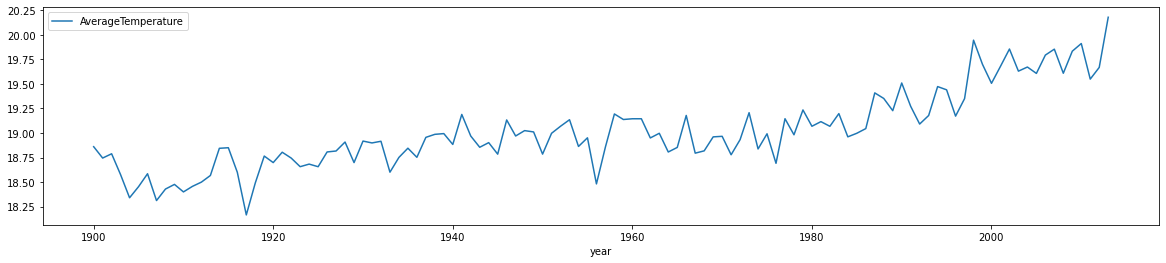

In [15]:
plt.figure(figsize = (20,4))
sns.lineplot(data = yearly_av)


<AxesSubplot:xlabel='AverageTemperature', ylabel='Density'>

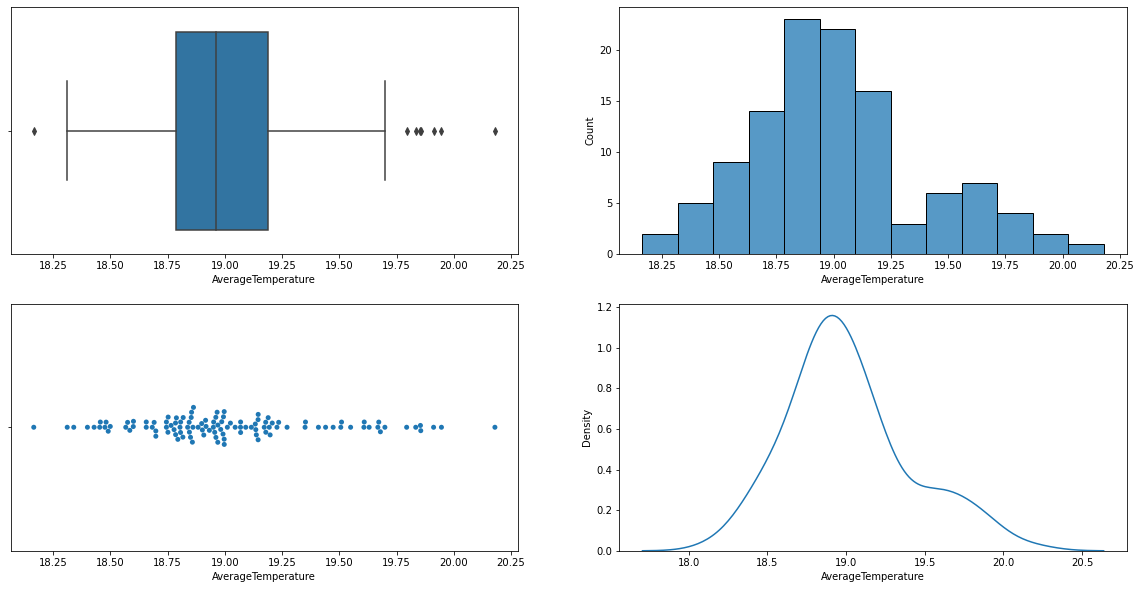

In [16]:
fig, ax = plt.subplots(2,2 ,figsize = (20,10))
sns.boxplot(x=yearly_av['AverageTemperature'],ax = ax[0,0])
sns.swarmplot(x=yearly_av['AverageTemperature'],ax = ax[1,0])
sns.histplot(yearly_av['AverageTemperature'],ax = ax[0,1])
sns.kdeplot(yearly_av['AverageTemperature'],ax = ax[1,1])

In [17]:
q3,q1 = np.percentile(yearly_av['AverageTemperature'],[75,25])
print('Q1 :' ,q1)
print('Q3 :' ,q3)

minimum = q1-1.5*(q3-q1)
maximum = q3+1.5*(q3-q1)

print('min :' ,minimum)
print('max :' ,maximum)

iqr = q3-q1
print('IQR :',iqr)

Q1 : 18.784315833333334
Q3 : 19.186425416666665
min : 18.18115145833334
max : 19.789589791666664
IQR : 0.40210958333333124


In [18]:
outliers_count = (yearly_av['AverageTemperature'] > maximum ).sum() + (yearly_av['AverageTemperature'] < minimum ).sum()
outliers_count

8

In [19]:
yearly_av[yearly_av['AverageTemperature'] > maximum ]

,AverageTemperature
year,
1998-01-01,19.946031
2002-01-01,19.855685
2006-01-01,19.793993
2007-01-01,19.854270
2009-01-01,19.833752
2010-01-01,19.911734
2013-01-01,20.179645


In [20]:
yearly_av[yearly_av['AverageTemperature'] < minimum ]

,AverageTemperature
year,
1917-01-01,18.164887


outliers here are 2 kinds .. the ones above the interquartile range are completely fine and are not outilers becaues we have an upword trend in the global average temperature and this increase started in the 90's

the second form is just 1 data point at the year 1917 which is a legit outlier, will fill it with the mean of the year befor and the year after.

In [21]:
yearly_av.loc['1917'] = (yearly_av.loc['1916']+yearly_av.loc['1918'])/2

In [22]:
yearly_av[yearly_av['AverageTemperature'] < minimum ]

,AverageTemperature
year,


In [23]:
yearly_av.loc['1917']

,AverageTemperature
year,
1917-01-01,NaN


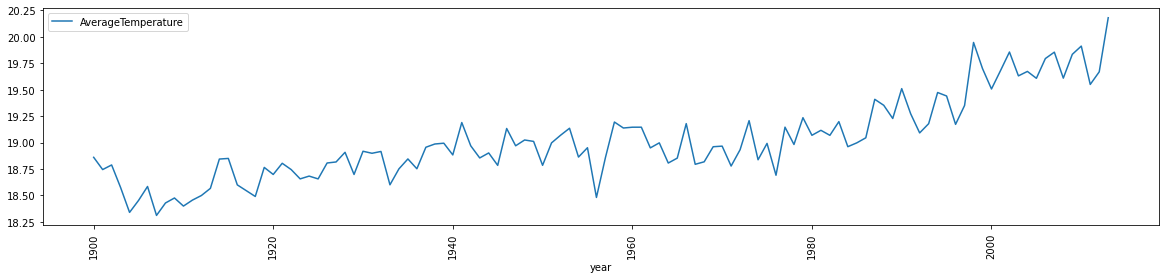

In [24]:
fig ,ax= plt.subplots(1,figsize = (20,4))
sns.lineplot(data = yearly_av['1900':],ax=ax)
plt.xticks(rotation = 90 );

## Stationarity , Trend and Seasonality

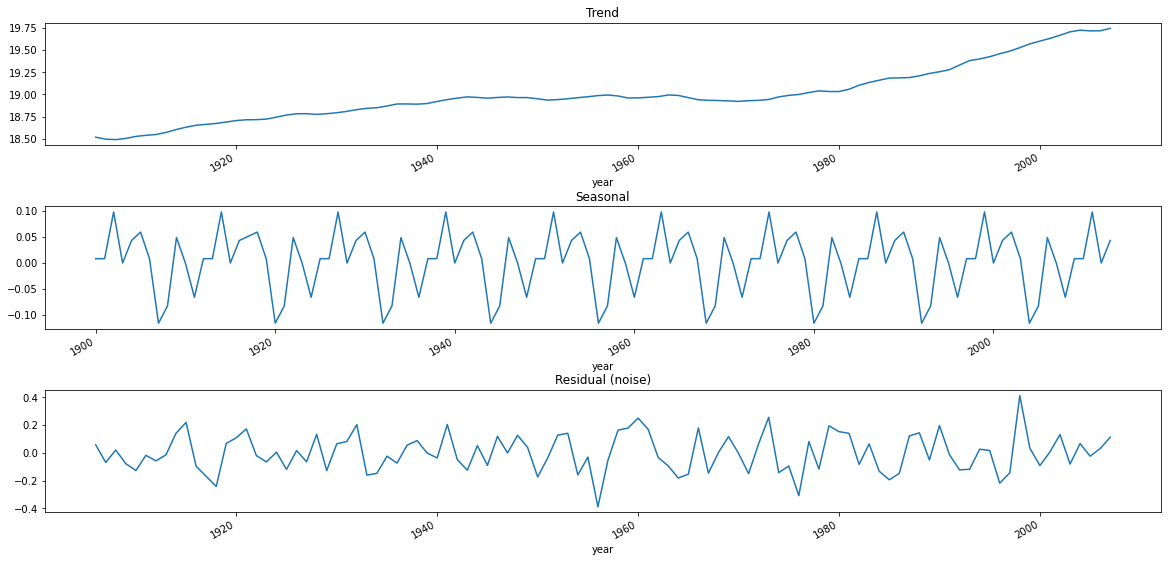

In [25]:
decomposed_yearly_av = seasonal_decompose(yearly_av['AverageTemperature'].dropna(),period = 12)
plot_decomposition(decomposed_yearly_av)

As expected .. non stationary

# Getting Alexandria data

In [26]:
data['Country'].unique()
#'Egypt','Syria'

array(["Côte D'Ivoire", 'Ethiopia', 'India', 'Syria', 'Egypt', 'Turkey',
       'Iraq', 'Thailand', 'Brazil', 'Germany', 'Colombia',
       'South Africa', 'Morocco', 'China', 'United States', 'Senegal',
       'Tanzania', 'Bangladesh', 'Pakistan', 'Zimbabwe', 'Vietnam',
       'Nigeria', 'Indonesia', 'Saudi Arabia', 'Afghanistan', 'Ukraine',
       'Congo (Democratic Republic Of The)', 'Peru', 'United Kingdom',
       'Angola', 'Spain', 'Philippines', 'Iran', 'Australia', 'Mexico',
       'Somalia', 'Canada', 'Russia', 'Japan', 'Kenya', 'France', 'Burma',
       'Italy', 'Chile', 'Dominican Republic', 'South Korea', 'Singapore',
       'Taiwan', 'Sudan'], dtype=object)

In [27]:
data[data['Country']=='Egypt'].count()

AverageTemperature               7550
AverageTemperatureUncertainty    7550
City                             7589
Country                          7589
Latitude                         7589
Longitude                        7589
dtype: int64

In [28]:
data[data['Country']=='Syria']

,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
dt,,,,,,
1791-05-01,20.836,1.993,Aleppo,Syria,36.17N,37.79E
1791-06-01,26.253,1.963,Aleppo,Syria,36.17N,37.79E
1791-07-01,28.458,1.761,Aleppo,Syria,36.17N,37.79E
1791-08-01,29.184,1.633,Aleppo,Syria,36.17N,37.79E
1791-09-01,24.552,2.187,Aleppo,Syria,36.17N,37.79E
...,...,...,...,...,...,...
2013-05-01,22.917,1.071,Aleppo,Syria,36.17N,37.79E
2013-06-01,27.292,0.735,Aleppo,Syria,36.17N,37.79E
2013-07-01,29.850,0.944,Aleppo,Syria,36.17N,37.79E


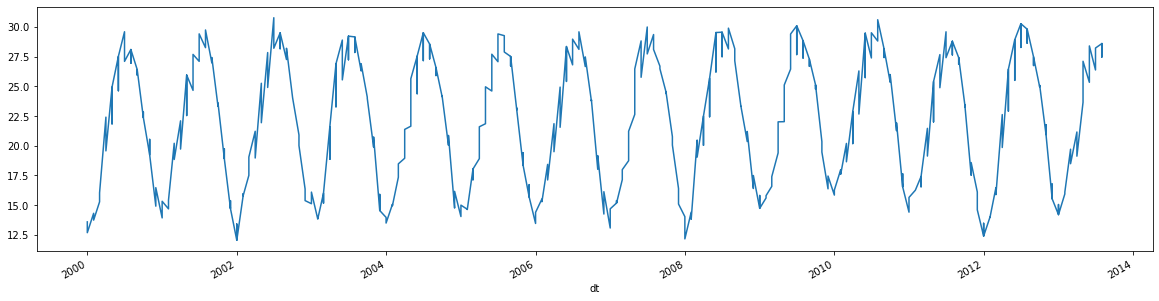

In [29]:
egypt_temp = data[data['Country']=='Egypt']
ax = egypt_temp['AverageTemperature']['2000-01-01':'2015-01-01'].plot(figsize = (20,5))

In [30]:
egypt_temp.isnull().sum()

AverageTemperature               39
AverageTemperatureUncertainty    39
City                              0
Country                           0
Latitude                          0
Longitude                         0
dtype: int64

In [31]:
egypt_temp = egypt_temp.fillna(method = 'ffill')
egypt_temp.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7589 entries, 1791-05-01 to 2013-09-01
Data columns (total 6 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   AverageTemperature             7589 non-null   float64
 1   AverageTemperatureUncertainty  7589 non-null   float64
 2   City                           7589 non-null   object 
 3   Country                        7589 non-null   object 
 4   Latitude                       7589 non-null   object 
 5   Longitude                      7589 non-null   object 
dtypes: float64(2), object(4)
memory usage: 673.1+ KB


<AxesSubplot:xlabel='dt'>

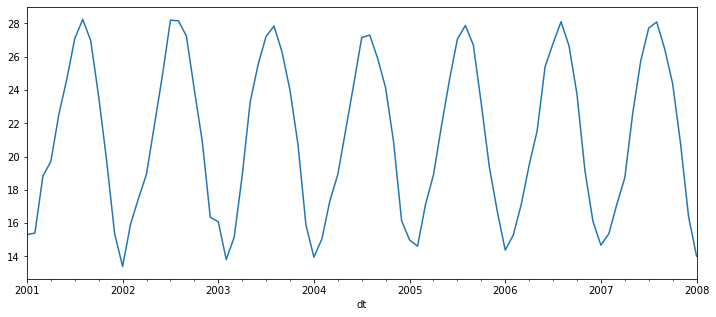

In [32]:
egypt_temp[egypt_temp['City']=='Alexandria']['AverageTemperature']['2001-01':'2008-01'].plot(figsize = (12,5))

## Working with alexandria tempretures

In [33]:
alex = pd.DataFrame(egypt_temp[egypt_temp['City']=='Alexandria']['AverageTemperature'])
alex.head()

,AverageTemperature
dt,
1791-05-01,20.772
1791-06-01,24.029
1791-07-01,25.483
1791-08-01,26.797
1791-09-01,24.464


In [34]:
alex.index = pd.DatetimeIndex(alex.index.values,
                               freq=alex.index.inferred_freq)

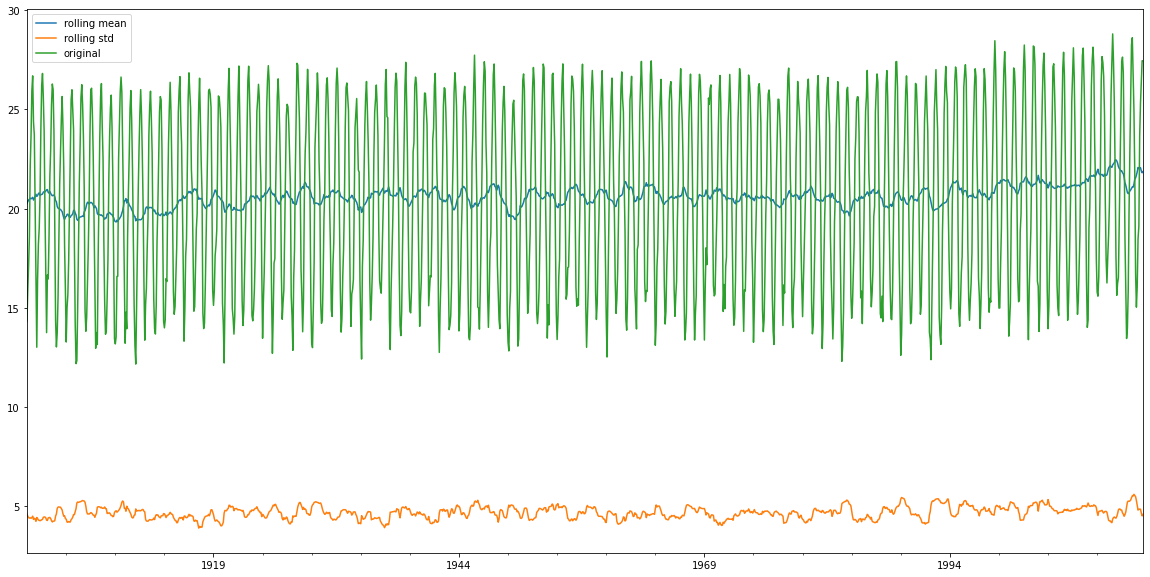

In [35]:
fig,ax = plt.subplots(1,figsize = (20,10))
rolling_mean = alex.rolling(window=12).mean()
rolling_std = alex.rolling(window=12).std()
rolling_mean['1900':].plot(ax = ax,legend = 'rolling mean')
rolling_std['1900':].plot(ax = ax,legend = 'rolling std')
alex['1900':].plot(ax = ax)
ax.legend(['rolling mean','rolling std','original'])

In [36]:
stationarity_test(alex['1900':]);

adf : -3.3460995559118656
p-value : 0.012939446369204194
n_lags : 23
n_pts : 1341
critical values : : {'1%': -3.435235802905193, '5%': -2.8636977029164603, '10%': -2.5679187656267293}
information critrion : 3404.53287932947


adf : -5.161392947409814
p-value : 1.0536190223817001e-05
n_lags : 23
n_pts : 2634
critical values : : {'1%': -3.4328350737532487, '5%': -2.8626379169370946, '10%': -2.5673544595439926}
information critrion : 7201.642919207085


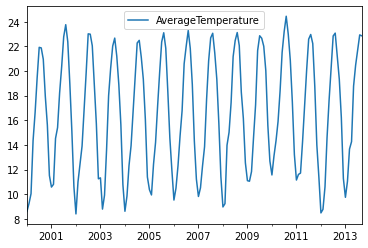

In [37]:
diff = (alex-rolling_std).dropna()
diff['2000':].plot();
stationarity_test(diff);

<AxesSubplot:>

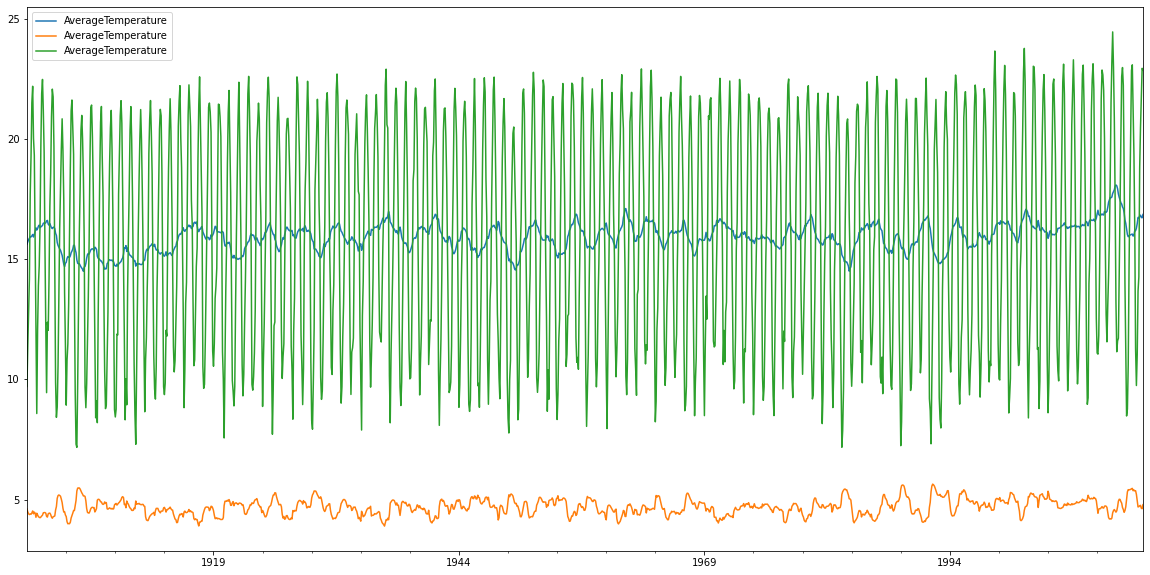

In [38]:
fig,ax = plt.subplots(1,figsize = (20,10))
rolling_mean_diff = diff.rolling(window=12).mean()
rolling_std_diff = diff.rolling(window=12).std()
rolling_mean_diff['1900':].plot(ax = ax)
rolling_std_diff['1900':].plot(ax = ax)
diff['1900':].plot(ax = ax)

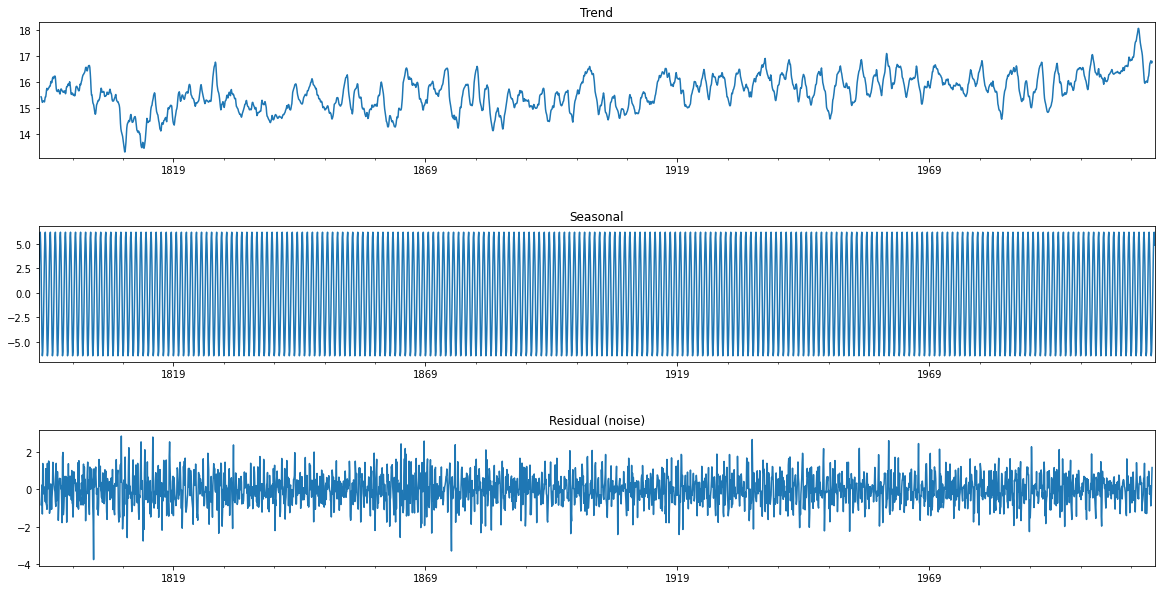

In [39]:
decompose = seasonal_decompose(diff)
plot_decomposition(decompose)

C:\Users\shehab\anaconda3\envs\py38ml\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


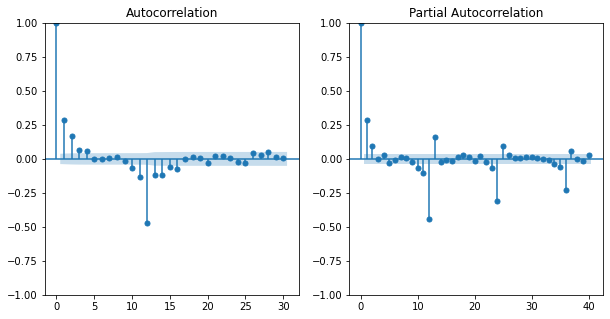

In [40]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

fig,ax = plt.subplots(1,2 ,figsize = (10,5))
diff_alex=alex.diff(12).dropna()

plot_acf(diff_alex,lags = 30 , ax = ax[0]);
plot_pacf(diff_alex,lags = 40,ax = ax[1]);

ACF suggensts an AR(2) model <br>
PACF suggests MA(1) or MA(0) <br>
and a monthly seasonal period (12 months) <br>
1st order diffrencing for trend <br>
<br>

SARIMA(P,D,Q),(p,d,q,m) = SARIMA(3,0,0),(0,1,1,12)


## Fitting SARIMAX model

In [41]:
alex_train = alex[:'2005-12-01']
alex_test = alex['2006-01-01':]

In [42]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
sarimax_alex =SARIMAX(alex_train,
                                order=(2, 0, 1),
                                seasonal_order=(0, 1, 1, 12),                                
                                enforce_stationarity=False,
                                enforce_invertibility=False,
                                trend = 'c')
                                #seasonal_order=(1, 1, 0, 12),

In [43]:
alex_model = sarimax_alex.fit()

C:\Users\shehab\anaconda3\envs\py38ml\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


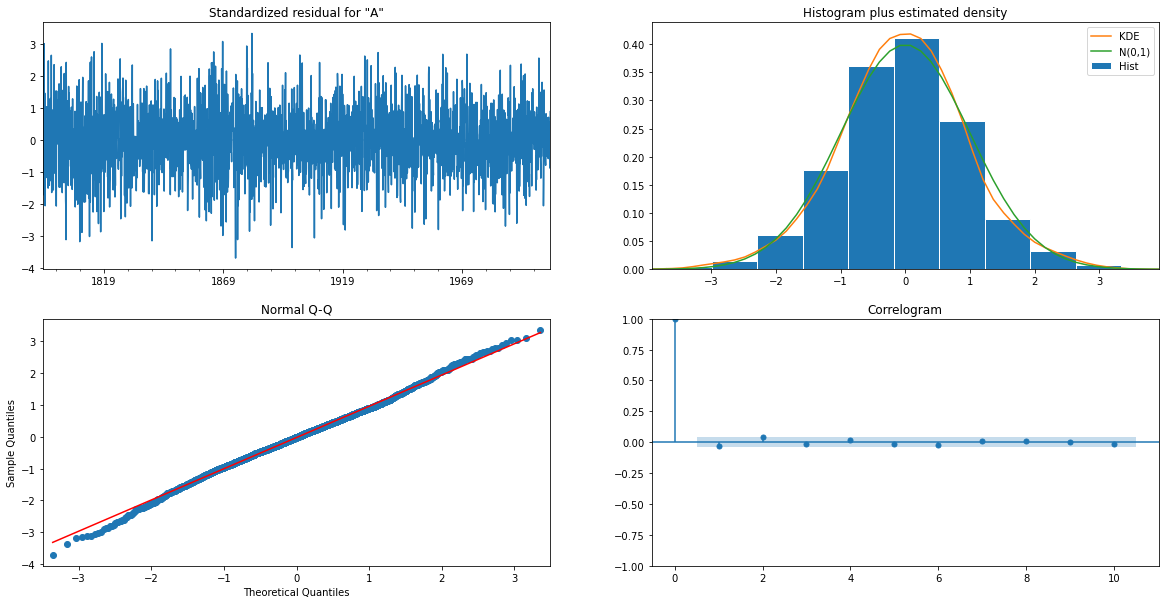

In [44]:
alex_model.plot_diagnostics(figsize = (20,10));

In [45]:
alex_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                 AverageTemperature   No. Observations:                 2576
Model:             SARIMAX(2, 0, 1)x(0, 1, 1, 12)   Log Likelihood               -3224.747
Date:                            Mon, 08 Aug 2022   AIC                           6461.495
Time:                                    02:37:32   BIC                           6496.558
Sample:                                05-01-1791   HQIC                          6474.212
                                     - 12-01-2005                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0002   8.59e-05      1.910      0.056    -4.3e-06       0.000
ar.L1          1.2433      0.031     40.018      0.000       1.182       1.304
ar.L2         -0.2674      0.024    -11.207      0.000      -0.314      -0.221
ma.L1         -0.9260      0.023    -40.793      0.000      -0.970      -0.881
ma.S.L12      -0.9581      0.007   -137.576      0.000      -0.972      -0.944
sigma2         0.7594      0.020     37.415      0.000       0.720       0.799
===================================================================================
Ljung-Box (L1) (Q):                   2.16   Jarque-Bera (JB):                18.22
Prob(Q):                              0.14   Prob(JB):                         0.00
Heteroskedasticity (H):               0.78   Skew:                            -0.04
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.41
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [46]:
predictions = alex_model.predict('2006-01-01','2013-09-01')
preds = pd.DataFrame(predictions)
preds.tail()

,predicted_mean
2013-05-01,21.930324
2013-06-01,24.797708
2013-07-01,26.666613
2013-08-01,27.245429
2013-09-01,26.095857


In [47]:
from sklearn.metrics import r2_score
r2_score(alex_test['AverageTemperature'],preds['predicted_mean'])

0.9544920772216768

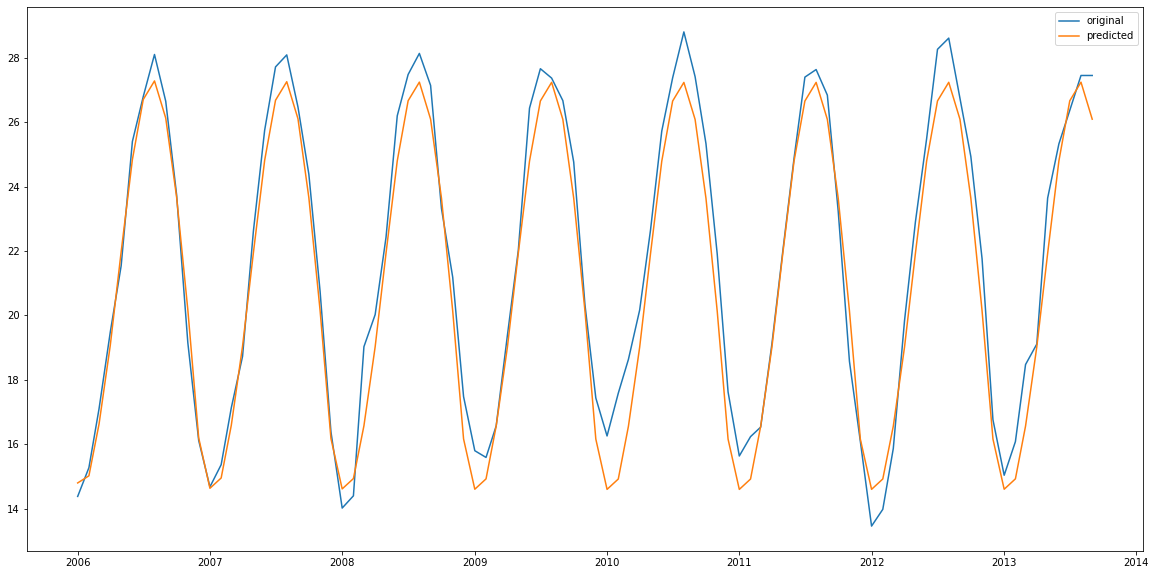

In [48]:
fig,ax = plt.subplots(1,figsize=(20,10))
ax.plot(alex_test,label = 'original')
ax.plot(preds,label = 'predicted')
ax.legend()

In [49]:
alex_model.predict('2013-8-01')[0]

27.24542882862521

In [50]:
import joblib
path = 'alex_model.pkl'
joblib.dump(alex_model,path)

['alex_model.pkl']

## Exporting data for PowerBI

In [51]:
alex['rolling_mean'] = rolling_mean['1900':]
alex['rolling_std'] = rolling_std['1900':]
alex['1900':].to_csv('alex_data.csv')
yearly_av['1900':].to_csv('yearl_av_data.csv')